## Homework 05:

## Due Date: Mar 09, 2020, 10:00am

#### Firstname Lastname: Yunya Wang

#### E-mail: yw4509@nyu.edu

#### Enter your solutions and submit this notebook

---

### Part of Lecture 04

---

In [4]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import math

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G

# def set_boundary_grid(G):
#     '''set the boundary values'''
#     n = G.shape[0]
#     G[:, 0]  = np.ones((1, n))
#     G[0, : ] = np.ones((1, n)) 
#     G[-1, :] = np.ones((1, n))
#     G[:, -1] = np.ones((1, n))
    
# in this assignment we will consider real matrices;
# hence we use the following function instead
# to assign the boundary values for G
def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = [1.0] * n
    G[0,  :] = [1.0] * n
    G[-1, :] = [1.0] * n
    G[:, -1] = [1.0] * n 

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using iterators to traverse the grid
def iteration_gen(G):
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        G[e]=(G[e[0] + 1, e[1]] + G[e[0] - 1, e[1]] + G[e[0], e[1] + 1] + G[e[0], e[1] - 1])/4
    

# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

    
def solve_heat_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

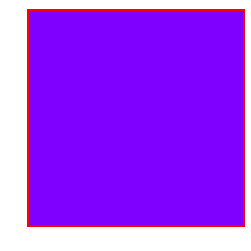

In [5]:
size_of_grid = 100
G = build_grid(n=size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

In [6]:
%load_ext line_profiler
%lprun -f solve_heat_equation4 G4 = solve_heat_equation4(size_of_grid)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


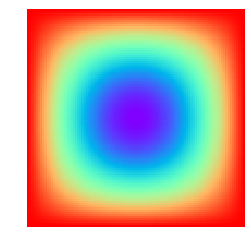

In [7]:
plot_grid(G4)


---

# Problem 1. (100 points)


In Lecture 04 we considered the heat equation over a homogeneous material for which an iteration is given by the following equation:
$$
f_{i,j} = \frac{f_{i+1,j}+f_{i-1,j} + f_{i,j+1} + f_{i,j-1}}{4} \,.
$$

This was implemented by: 
```
# using iterators to traverse the grid
def iteration_gen(G):
"""the iteration function from lect04"""
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        G[e]=(G[e[0] + 1, e[1]] + G[e[0] - 1, e[1]] + G[e[0], e[1] + 1] + G[e[0], e[1] - 1])/4
```


----

Now imagine, you are given a non-homogeneous material for which the iteration, i.e. the corresponding equation,  depends on the position $(i, j)$ and is given by:
$$
f_{i,j} := \frac{ h_{i + 1,j} f_{i + 1, j} + h_{i - 1,j} f_{i - 1,j} + h_{i,j + 1} f_{i,j+1} + h_{i,j - 1} f_{i,j-1}}{ h_{i + 1,j} + h_{i - 1,j} + h_{i,j + 1} + h_{i,j - 1} } \,.
$$
Here "weight"
$$h(i, j) = \exp\left(-\frac{|i - j|} {\sqrt{n}}\right) \,,$$
corresponds to the point $(i, j)$, where $n$ is the size of the grid.

----

Write a new function:
```
def iteration_gen_nonhomogeneous(G):
    """the iteration function in hw05"""
```
to solve the non-homogeneous case defined as above. 


The task here is to examine run-time improvements that can be obtained by Cython for this non-homogeneous material. Consider **solve_heat_equation4** from Lect04, which now becomes.

```
def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)
```

----

Concretely, as presented in Lect05, perform the following steps and measure their run-times:

(i) simply compile the python code with Cython, without any changes;


(ii) introduce variables and arrays with ctypes (by using the command cdef);  


(iii) besides (ii), also use the content of ndarray objects in order to efficiently access the data buffer of the arrays.

---

In the sequel of the notebook, as your solution, submit codes, run-times, and plots of the following tasks:

**2.1 (30pt)** solve_heat_nonhomogeneous_equation4(100)

**2.2 (10pt)** solve_heat_nonhomogeneous_equation4(100) when applied (i)  

**2.3 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (ii)  

**2.4 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (iii)  

Notice that to obtain a best performance for the heat equation you also need to apply (i), (ii), (iii) to the functions called within "solve_heat_equation4".


In [8]:
%load_ext Cython

In [9]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [10]:
size_of_grid = 100

### Part 1: solve_heat_equation4(100)

In [86]:
def iteration_gen_nonhomogeneous(G): 
    n = G.shape[0]
    def h(i,j,n): return math.exp(-abs(i-j)/n**0.5)
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        h_1 = h(e[0]+1,e[1],n)
        h_2 = h(e[0]-1,e[1],n)
        h_3 = h(e[0],e[1]+1,n)
        h_4 = h(e[0],e[1]-1,n)

        sumh=  h_1+h_2+h_3+h_4                                                                                
        G[e] =(G[e[0]+1,e[1]]*h_1+
               G[e[0]-1,e[1]]*h_2+
               G[e[0],e[1]+1]*h_3+
               G[e[0],e[1]-1]*h_4)/sumh

In [87]:
def solve_heat_nonhomogenous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)

    G_prev = build_grid(n)
    copy_array(G, G_prev)

    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

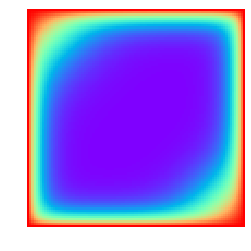

In [88]:
%lprun -f solve_heat_nonhomogenous_equation4 G = solve_heat_nonhomogenous_equation4(size_of_grid)
plot_grid(G)

### Part 2: solve_heat_equation4(100) after applying (i)


In [77]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [94]:
%%cython
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1
# cython: profile=True

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import math

size_of_grid = 100

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G
    
# in this assignment we will consider real matrices;
# hence we use the following function instead
# to assign the boundary values for G
def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = [1.0] * n
    G[0,  :] = [1.0] * n
    G[-1, :] = [1.0] * n
    G[:, -1] = [1.0] * n 

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using iterators to traverse the grid
def iteration_gen_nonhomogeneous(G): 
    n = G.shape[0]
    def h(i,j,n): return math.exp(-abs(i-j)/n**0.5)
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        h_1 = h(e[0]+1,e[1],n)
        h_2 = h(e[0]-1,e[1],n)
        h_3 = h(e[0],e[1]+1,n)
        h_4 = h(e[0],e[1]-1,n)

        sumh=  h_1+h_2+h_3+h_4                                                                                
        G[e] =(G[e[0]+1,e[1]]*h_1+
               G[e[0]-1,e[1]]*h_2+
               G[e[0],e[1]+1]*h_3+
               G[e[0],e[1]-1]*h_4)/sumh
    

# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

def solve_heat_nonhomogenous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)

    G_prev = build_grid(n)
    copy_array(G, G_prev)

    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

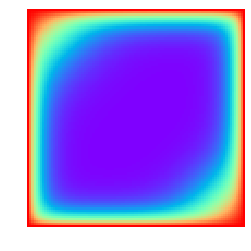

In [95]:
%lprun -f solve_heat_nonhomogenous_equation4 G = solve_heat_nonhomogenous_equation4(size_of_grid)
plot_grid(G)

### Part 3: solve_heat_equation4(100) after applying (ii)

In [42]:
%%cython
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1
# cython: profile=True

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import math

cimport numpy as np

cdef int size_of_grid = 100

def build_grid(int n):
    '''defines the grid'''
    cdef np.ndarray G = np.zeros((n, n),dtype=float)
    return G
    
# in this assignment we will consider real matrices;
# hence we use the following function instead
# to assign the boundary values for G
def set_boundary_grid(np.ndarray G):
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = [1.0] * n
    G[0,  :] = [1.0] * n
    G[-1, :] = [1.0] * n
    G[:, -1] = [1.0] * n 

def plot_grid(np.ndarray G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using iterators to traverse the grid
def iteration_gen_nonhomogeneous(np.ndarray G): 
    cdef int n = G.shape[0]
    cdef (int,int) e
    cdef double sumh
    cdef double h_1
    cdef double h_2
    cdef double h_3
    cdef double h_4
    
    def h(int i,int j,int n): return math.exp(-abs(i-j)/n**0.5)
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        h_1 = h(e[0]+1,e[1],n)
        h_2 = h(e[0]-1,e[1],n)
        h_3 = h(e[0],e[1]+1,n)
        h_4 = h(e[0],e[1]-1,n)

        sumh=  h_1+h_2+h_3+h_4                                                                                
        G[e] =(G[e[0]+1,e[1]]*h_1+
               G[e[0]-1,e[1]]*h_2+
               G[e[0],e[1]+1]*h_3+
               G[e[0],e[1]-1]*h_4)/sumh
    

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray G1, np.ndarray G2):
    cdef double error
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(np.ndarray G1, np.ndarray G2):
    G2[:, :] = G1[:, :]

def solve_heat_nonhomogenous_equation4(int n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef double error
    
    cdef np.ndarray G = build_grid(n)
    set_boundary_grid(G)

    cdef np.ndarray G_prev = build_grid(n)
    copy_array(G, G_prev)

    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

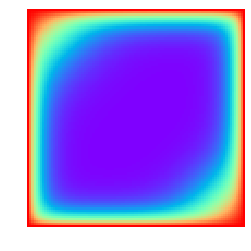

In [43]:
%lprun -f solve_heat_nonhomogenous_equation4 G = solve_heat_nonhomogenous_equation4(size_of_grid)
plot_grid(G)

### Part 4: solve_heat_equation4(100) after applying (iii)

In [14]:
%reload_ext Cython

In [36]:
%%cython
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1
# cython: profile=True

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import math

cimport numpy as np

cdef int size_of_grid = 100

def build_grid(int n):
    '''defines the grid'''
    cdef np.ndarray[double, ndim=2] G = np.zeros([n, n],dtype=float)
    return G
    
# in this assignment we will consider real matrices;
# hence we use the following function instead
# to assign the boundary values for G
def set_boundary_grid(np.ndarray[double, ndim=2] G):
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = [1.0] * n
    G[0,  :] = [1.0] * n
    G[-1, :] = [1.0] * n
    G[:, -1] = [1.0] * n 

def plot_grid(np.ndarray[double, ndim=2] G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using iterators to traverse the grid
def iteration_gen_nonhomogeneous(np.ndarray[double, ndim=2] G): 
    cdef int n = G.shape[0]
    cdef (int,int) e
    cdef double sumh
    cdef double h_1
    cdef double h_2
    cdef double h_3
    cdef double h_4
    
    def h(int i,int j,int n): return math.exp(-abs(i-j)/math.sqrt(n))
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        h_1 = h(e[0]+1,e[1],n)
        h_2 = h(e[0]-1,e[1],n)
        h_3 = h(e[0],e[1]+1,n)
        h_4 = h(e[0],e[1]-1,n)

        sumh=  h_1+h_2+h_3+h_4                                                                                
        G[e] =(G[e[0]+1,e[1]]*h_1+
               G[e[0]-1,e[1]]*h_2+
               G[e[0],e[1]+1]*h_3+
               G[e[0],e[1]-1]*h_4)/sumh
    

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray[double, ndim=2] G1, np.ndarray[double, ndim=2] G2):
    cdef double error
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(np.ndarray[double, ndim=2] G1, np.ndarray[double, ndim=2] G2):
    G2[:, :] = G1[:, :]

def solve_heat_nonhomogenous_equation4(int n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef double error
    
    cdef np.ndarray[double, ndim=2] G = build_grid(n)
    set_boundary_grid(G)

    cdef np.ndarray[double, ndim=2] G_prev = build_grid(n)
    copy_array(G, G_prev)

    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

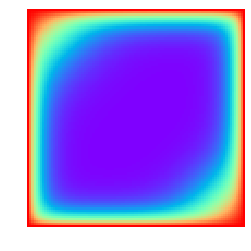

In [38]:
%lprun -f solve_heat_nonhomogenous_equation4 G = solve_heat_nonhomogenous_equation4(size_of_grid)
plot_grid(G)